# First try with NMF output

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import pandas as pd

nmf_file = "./NMF_outputs/NMF_outputs_T1.csv"
nmf_data = pd.read_csv(nmf_file, sep=';')
nmf_data = nmf_data.drop(columns=["Unnamed: 0"])
print(nmf_data.head())


      motor  attention  executive   sensory  language   neglect  Labels  \
0  0.005281   0.031476   0.275039  0.000000  0.479126  0.077580       0   
1  0.051270   0.000000   0.337788  0.000000  0.301764  0.046970       0   
2  0.036078   0.172249   0.396082  0.000000  0.516866  0.015407       0   
3  0.017006   0.090199   0.430193  0.070678  0.548859  0.186927       0   
4  0.020589   0.288018   0.347092  0.000000  0.458314  0.112118       0   

   Labels_bis  
0           1  
1           1  
2           1  
3           1  
4           1  


In [2]:
motor_scores = nmf_data["motor"].values.reshape(-1, 1) 
gmm = GaussianMixture(n_components=2, random_state=42) # 2 clusters
gmm.fit(motor_scores)
clusters = gmm.predict(motor_scores)
nmf_data["motor_cluster"] = clusters
print(nmf_data.head())

      motor  attention  executive   sensory  language   neglect  Labels  \
0  0.005281   0.031476   0.275039  0.000000  0.479126  0.077580       0   
1  0.051270   0.000000   0.337788  0.000000  0.301764  0.046970       0   
2  0.036078   0.172249   0.396082  0.000000  0.516866  0.015407       0   
3  0.017006   0.090199   0.430193  0.070678  0.548859  0.186927       0   
4  0.020589   0.288018   0.347092  0.000000  0.458314  0.112118       0   

   Labels_bis  motor_cluster  
0           1              0  
1           1              0  
2           1              0  
3           1              0  
4           1              0  


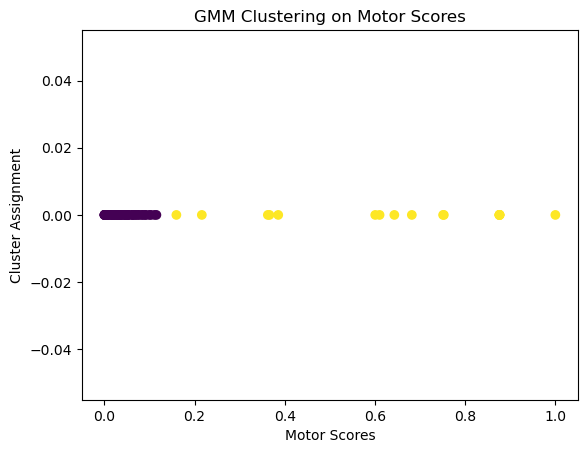

In [3]:
import matplotlib.pyplot as plt

plt.scatter(motor_scores, [0] * len(motor_scores), c=clusters, cmap="viridis")
plt.xlabel("Motor Scores")
plt.ylabel("Cluster Assignment")
plt.title("GMM Clustering on Motor Scores")
plt.show()


In [4]:
print("AIC:", gmm.aic(motor_scores))
print("BIC:", gmm.bic(motor_scores))


AIC: -139.7748371897372
BIC: -128.25451172371635


# Second try with 4 features of motor tests

C:\Users\angel\AppData\Local\Temp\ipykernel_16228\2556999220.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_motor_tests["Cluster"] = gmm.predict(data_scaled)
C:\Users\angel\AppData\Local\Temp\ipykernel_16228\2556999220.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_motor_tests["Cluster"] = gmm.predict(data_scaled)
C:\Users\angel\AppData\Local\Temp\ipykernel_16228\2556999220.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

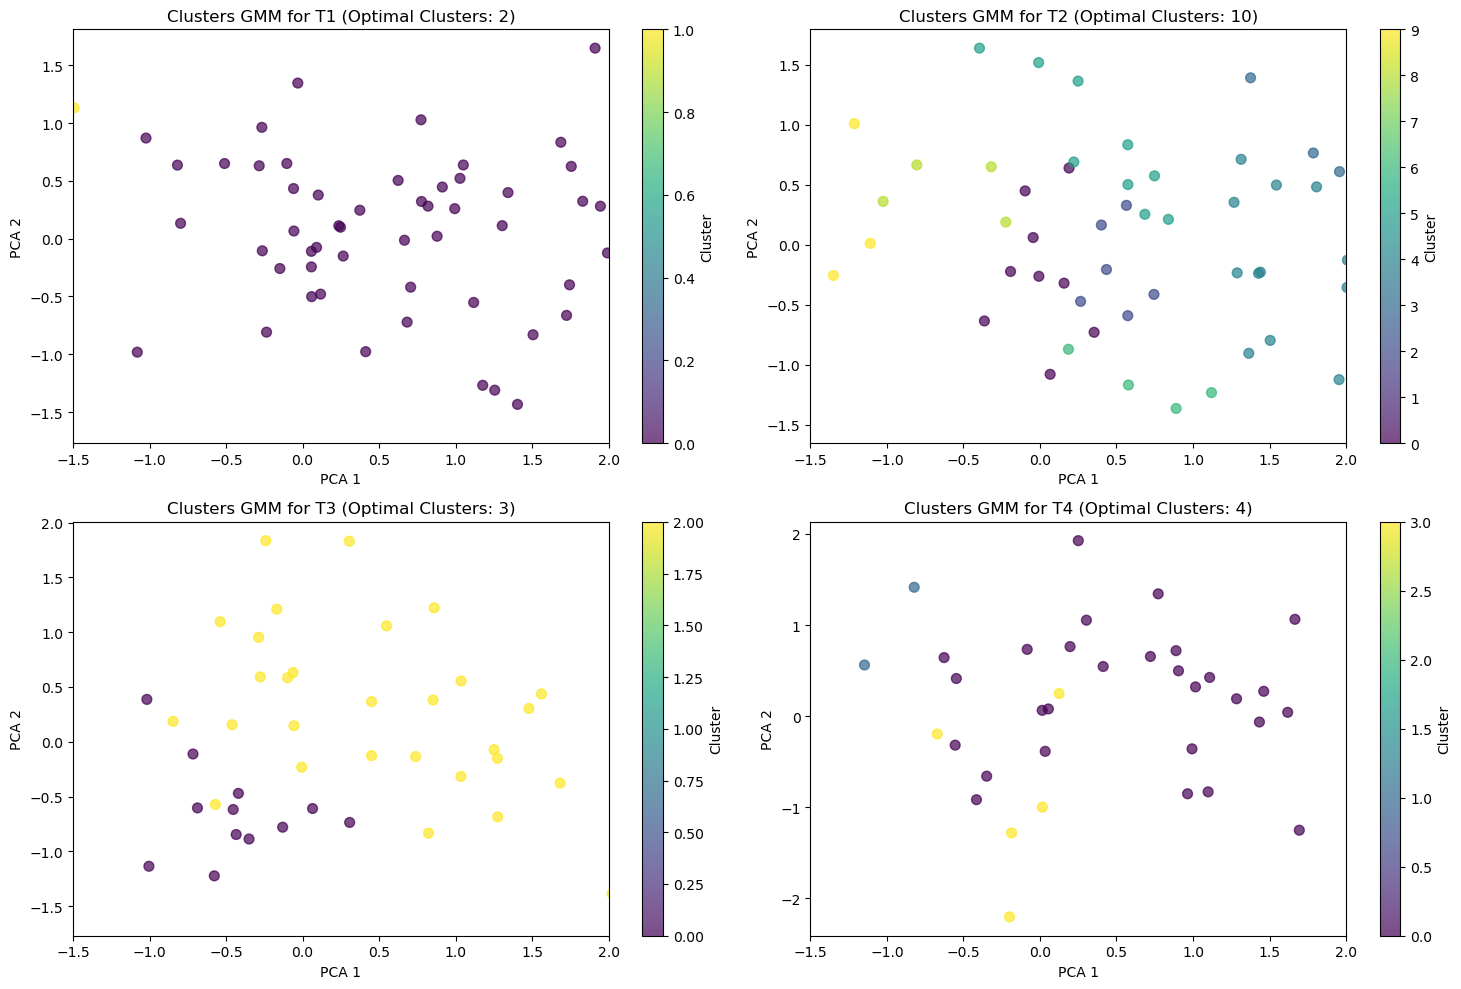

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_paths = [
    "./Raw_MissingDataImputed/TiMeS_matrix_mdImputed_allT1.xlsx",
    "./Raw_MissingDataImputed/TiMeS_matrix_mdImputed_allT2.xlsx",
    "./Raw_MissingDataImputed/TiMeS_matrix_mdImputed_allT3.xlsx",
    "./Raw_MissingDataImputed/TiMeS_matrix_mdImputed_allT4.xlsx"
]

plot_titles = [
    "T1",
    "T2",
    "T3",
    "T4"
]

motor_tests = [
    "Fugl.Meyer_affected_TOTAL",
    "P.G_affected_FIST_mean",
    "B.B_blocks_affected_hand",
    "Purdue_affected_hand"
]

plt.figure(figsize=(15, 10))
for idx, (file_path, title_suffix) in enumerate(zip(file_paths, plot_titles), start=1):
    data = pd.read_excel(file_path)

    # Filter the motor tests
    data_motor_tests = data[motor_tests]

    # Data standarizazion
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_motor_tests)

    # To find the optimal nb of clusters
    bic_scores = []
    n_clusters_range = range(1, 11)
    for n in n_clusters_range:
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(data_scaled)
        bic_scores.append(gmm.bic(data_scaled))

    optimal_clusters = n_clusters_range[bic_scores.index(min(bic_scores))]

    # GMM for optimal number of clusters
    gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
    gmm.fit(data_scaled)

    data_motor_tests["Cluster"] = gmm.predict(data_scaled)

    # PCA reduction to 2 dimensions
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)

    plt.subplot(2, 2, idx)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_motor_tests["Cluster"], cmap="viridis", s=50, alpha=0.7)
    plt.title(f"Clusters GMM for {title_suffix} (Optimal Clusters: {optimal_clusters})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(label="Cluster")
    plt.xlim([-6, 3])
    plt.xlim([-1.5, 2])

plt.tight_layout()
plt.show()
